# ECON202A Problem Set

Team members: David Johannes, Bailey Johnson, Chandni Raja, Natasha Watkins

### Problem 1

Given $u(c_t) = -\frac{1}{2} (\bar{c} - c_t)^2$ and $r = \delta$,

\begin{align*}
    u'(c_t) &= \bar{c} - c_t
\end{align*}

By the Theorem (Hall, pg. 974)

\begin{align*}
    E_t u'(c_{t+1}) &= \frac{1+\delta}{1+r} u'(c_t) \\
    \Rightarrow \bar{c} - E_t c_{t+1} &= \bar{c} - c_t \\
    c_t &= E_t c_{t+1} \\
    \Rightarrow c_{t+1} &= c_t - \varepsilon_{t+1}
\end{align*}

Where $\varepsilon_{t+1}$ is the true disturbance term, so that $E_t \varepsilon_{t+1} = 0$, and therefore is white noise. This is a random walk process with no constant. 

### Problem 2

The permanent-income hypothesis suggests that consumers' behaviour incorporates expectations of their future ability to consume, i.e., their consumption today should reflect their expectation of future income in all periods.  Forecasting future consumption should therefore only be a function of current consumption, as current consumption incorporates expectations of all other variables that might affect consumption, and so the stochastic process for income is irrelevant for forecasting.

As consumption in the next period is only a function of current consumption, the error term has no effect on the level of consumption, i.e., $E_t \varepsilon_{t+1} = 0$. Because $c_{t+1}$ is not explained by consumption in any period apart from $t$, the error terms are uncorrelated, i.e., $E_t(\varepsilon_{t+1} \varepsilon_{t+\tau}) = 0$ for all $\tau \neq 1$. Therefore, the error term is a white noise process.

### Problem 3

When $r=\delta$ the agent does not get any utility from investing a unit of consumption today to consume tomorrow, since the interest he would gain on investing is exactly the same as his preference rate for consumption today. However, when $r>\delta$ the real rate of interest is higher than the subjective time preference, as such he would choose a certain level of investment since the gains from investment outweigh his preference for consumption today. Thus, consumption would evolve as a random walk, just as in question 2, but with a positive drift.

Mathematically:
\begin{align*}
    E_t u'(c_{t+1}) &= \frac{1+\delta}{1+r} u'(c_t) \\
    \Rightarrow \bar{c} - E_t c_{t+1} &= \frac{1+\delta}{1+r} \left(\bar{c} - c_t\right) \\
    E_t c_{t+1} &= \bar{c} \left(1-\frac{1+\delta}{1+r}\right) + \frac{1+\delta}{1+r} c_t \\
    \Rightarrow c_{t+1} &= \beta_0 + \lambda c_t - \varepsilon_{t+1}
\end{align*}

Where $\beta_0 = \frac{r-\delta}{1+r} > 0$, and $\lambda = \frac{1+\delta}{1+r} > 0$

### Problem 4

In [1]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import OLS, tsa
from numpy.linalg import inv

In [2]:
fred = Fred(api_key='16fc433e0cb217bb8cb94bf76b981f2f')
c = fred.get_series('A794RX0Q048SBEA')  # Real personal consumption expenditures per capita

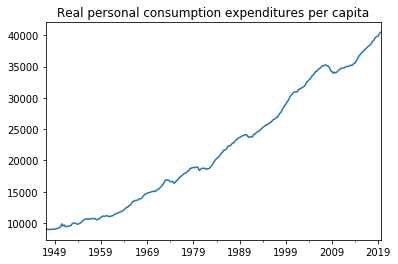

In [3]:
c.plot(title='Real personal consumption expenditures per capita')
plt.show()

In [4]:
data = pd.DataFrame()
data['y'] = np.log(c).values
data['X'] = np.log(c).shift(1).values # Shift to obtain consumption last period
data['constant'] = 1
data = data[1:]  # Drop first observation

In [5]:
model = OLS(data.y, data[['constant', 'X']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.886e+05
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:06:57   Log-Likelihood:                 990.19
No. Observations:                 290   AIC:                            -1976.
Df Residuals:                     288   BIC:                            -1969.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.0148      0.010      1.486      0.1

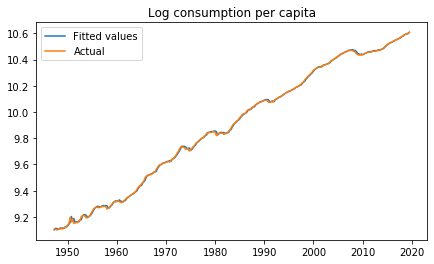

In [6]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(c.index[1:], results.fittedvalues, label='Fitted values')
ax.plot(c.index[1:], data.y, label='Actual')
plt.title('Log consumption per capita')
plt.legend()
plt.show()

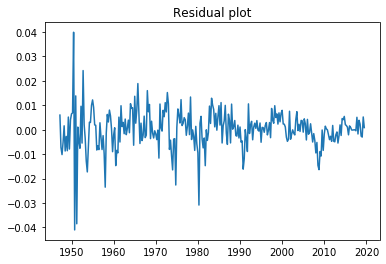

In [7]:
plt.plot(c.index[1:], results.resid)
plt.title('Residual plot')
plt.show()

The AR(1) process appears to be a reasonable statistical model of log consumption. The autoregressive coefficient is 0.999, indicating that log consumption is highly autoregressive. The residual plot shows that something similiar to a white noise process. The $R^2$ value indicates current consumption is explained almost perfectly by previous period's consumption.

### Problem 5

The capital share of income is
\begin{align*}
\frac{rk}{y} &= \frac{rk}{k^\theta} = rk^{1 - \theta} \\
r &= \frac{dy}{dk} = \theta k^{\theta - 1} \\
\Rightarrow \frac{rk}{y} &= \theta = 0.25
\end{align*}

To find $\beta$ and $\delta$, note that the share of investment is
\begin{align*}
\frac{i}{y} = \frac{\delta k}{y} = \frac{\delta k}{k^\theta} = \delta k^{1 - \theta} = 0.25 = \theta
\end{align*}
This implies $\delta = r = 0.05$.

From the steady state version of the Euler equation we found in problem 6, we have
\begin{align*}
\frac{1}{\beta} = \theta \frac{y}{k} + 1 - \delta = \theta \frac{k^\theta}{k} + 1 - \delta = \theta \frac{1}{k^{1-\theta}} + 1 - \delta = \theta \frac{\delta}{\theta} + 1 - \delta = 1
\end{align*}
This implies $\beta = 1$.

In [8]:
# Set parameter values
ρ = 0.9
σ = np.sqrt(0.005)
θ = 0.25
δ = r = 0.05
β = 1

### Problem 6

We can write this model recursively as
\begin{align*}
    V(k, z) = \max_{k'} \left \{ \log (c) + \beta E[V(k', z')|z] \right \}
\end{align*}
subject to
\begin{align*}
    k' + c &= y + (1 - \delta) k \\
    y &= zk^\theta \\
    \log z' &= \rho \log z + \varepsilon'
\end{align*}

The first order condition is
\begin{align*}
    \frac{1}{c} = \beta E[V_1(k', z')|z]
\end{align*}
And the envelope condition is
\begin{align*}
    V_1(k, z) = \frac{z\theta k^{\theta-1} + 1 - \delta}{c}
\end{align*}
Combining,
\begin{align*}
    \frac{1}{c} = \beta E \left[ \left. \frac{1}{c'} (\theta \frac{y'}{k'} + 1 - \delta) \right|z \right]
\end{align*}

The steady state solution is given by
\begin{align*}
     1 &= \beta \left[ \theta \frac{\bar{y}}{\bar{k}} + 1 - \delta \right]\\
     \bar{y} &= \bar{c} + \delta \bar{k} \\
     \bar{y} &= \bar{k}^\theta
\end{align*}
We can use these to solve for the steady values of $y$, $k$ and $c$

Rearranging, we have
\begin{align*}
\bar{k} = \left(\frac{1}{\theta} \left[\frac{1}{\beta} - (1 - \delta) \right] \right)^{\frac{1}{\theta - 1}}
\end{align*}

In [9]:
k_bar = ((1 / θ) * ((1 / β) - (1 - δ)))**(1 / (θ - 1))
y_bar = k_bar**θ
c_bar = y_bar - δ * k_bar

The solution to the planner's problem is given by
\begin{align}
    \frac{1}{c_t} &= \beta E_t \left[ \frac{1}{c_{t+1}} (\theta \frac{y_{t+1}}{k_{t+1}} + 1 - \delta) \right] \tag{1}\\
    k_{t+1} + c_t &= y_t + (1 - \delta) k_t \tag{2} \\
    y_t &= z_t k_t^\theta \tag{3}
\end{align}

The steady state versions of these are
\begin{align}
    1 &= \beta \left[ \theta \frac{y}{k} + 1 - \delta \right] \tag{4} \\
    y &= c + \delta k \tag{5} \\
    y &= k^\theta \tag{6}
\end{align}

**Log-linearization of (1)**
\begin{align*}
    \frac{1}{c}e^{-\tilde{c_t}} &= \beta E_t \left[ \frac{1}{c}e^{-\tilde{c}_{t+1}} ( \frac{y}{k} e^{\tilde{y}_{t+1} - \tilde{k}_{t+1}}  + 1 - \delta) \right] \\
    \Rightarrow
    \frac{1}{c}e^{-\tilde{c_t}} &= \beta E_t \left[ \frac{1}{c}( \frac{y}{k} e^{\tilde{y}_{t+1} - \tilde{k}_{t+1}-\tilde{c}_{t+1}}  + (1 - \delta)e^{-\tilde{c}_{t+1}}) \right]
\end{align*}
By Taylor's theorem, we can approximate $e^{\tilde{x}} \approx 1 + \tilde{x}$, so
\begin{align*}
    \frac{1}{c}(1-\tilde{c_t}) &= \beta E_t \left[ \frac{1}{c} (\frac{y}{k}(1 + \tilde{y}_{t+1} - \tilde{k}_{t+1} -\tilde{c}_{t+1}) + (1 - \delta)(1-\tilde{c}_{t+1}) \right]
\end{align*}

Multiplying by $c$ and using (4) , we can drop the constants
\begin{align*}
    -\tilde{c_t} &= \beta \frac{y}{k}E_t[\tilde{y}_{t+1}] - \beta \frac{y}{k} \tilde{k}_{t+1} - E_t[\tilde{c}_{t+1}]
\end{align*}

**Log-linearization of (2)**
\begin{align*}
    ke^{\tilde{k}_{t+1}} + ce^{\tilde{c}_t} &= ye^{\tilde{y}_t} + (1 - \delta) ke^{\tilde{k}_t} \\
    k(1+\tilde{k}_{t+1}) + c(1+\tilde{c}_t) &= y(1+\tilde{y}_t) + (1 - \delta) k(1+\tilde{k}_t)
\end{align*}

Using (5), we can drop the constants
\begin{align*}
    k\tilde{k}_{t+1} + c\tilde{c}_t &= y\tilde{y}_t + (1 - \delta) k\tilde{k}_t
\end{align*}

**Log-linearization of (3)**
\begin{align*}
    ye^{\tilde{y}_t} &= z k^\theta e^{ \tilde{z}_t + \theta \tilde{k}_t } \\
    y(1 + \tilde{y}_t) &= z k^\theta (1 + \tilde{z}_t + \theta \tilde{k}_t )
\end{align*}
Using (6) and the steady state value for $z$, we get
\begin{align*}
     \tilde{y}_t &= \tilde{z}_t +  \theta\tilde{k}_t
\end{align*}

### Problem 7

The Markovian form of the system is

$$
    E
    \begin{bmatrix}
    \tilde{c}_{t+1} \\
    \tilde{k}_{t+1} \\
    \tilde{z}_{t+1}
    \end{bmatrix}
    =
    \begin{bmatrix}
    1 - \beta R \frac{c}{k} & R & \beta \frac{y}{k}(\rho +  R) \\
    -\frac{c}{k} & \frac{1}{\beta} & \frac{y}{k} \\
    0 & 0 & \rho
    \end{bmatrix}
    \begin{bmatrix}
    \tilde{c}_t \\
    \tilde{k}_t \\
    \tilde{z}_t
    \end{bmatrix} 
    =
    M
    \begin{bmatrix}
    \tilde{c}_{t} \\
    \tilde{k}_{t} \\
    \tilde{z}_{t}
    \end{bmatrix}  
$$

where $R = (\theta - 1) \frac{y}{k}$

This was obtained by
\begin{align*}
    k\tilde{k}_{t+1}  &= y\tilde{y}_t + (1 - \delta) k\tilde{k}_t - c\tilde{c}_t \\
    &= y(\tilde{z}_t +  \theta\tilde{k}_t) + (1 - \delta) k\tilde{k}_t - c\tilde{c}_t \\
    \Rightarrow
    \tilde{k}_{t+1} &= \frac{y}{k}\tilde{z}_t + \frac{y}{k}\theta\tilde{k}_t + (1 - \delta) \tilde{k}_t - \frac{c}{k}\tilde{c}_t \\
    &= \frac{y}{k}\tilde{z}_t + (1 - \delta + \frac{y}{k} \theta )\tilde{k}_t - \frac{c}{k}\tilde{c}_t \\
    &= \frac{y}{k}\tilde{z}_t + \frac{1}{\beta} \tilde{k}_t - \frac{c}{k}\tilde{c}_t \\ \\
    E_t[\tilde{c}_{t+1}]  &= \beta \frac{y}{k}E_t[\tilde{y}_{t+1}] - \beta \frac{y}{k} \tilde{k}_{t+1} + \tilde{c_t} \\
    &= \beta \frac{y}{k}E_t[\tilde{z}_{t+1} +  \theta\tilde{k}_{t+1}] - \beta \frac{y}{k} \tilde{k}_{t+1} + \tilde{c_t}\\
    &= \beta \frac{y}{k} \rho \tilde{z}_t + \beta \frac{y}{k} \theta\tilde{k}_{t+1} - \beta \frac{y}{k} \tilde{k}_{t+1} + \tilde{c_t} \\
    &= \beta \frac{y}{k} \rho \tilde{z}_t + \beta \frac{y}{k} (\theta-1) \tilde{k}_{t+1} + \tilde{c_t} \\
    &= \beta \frac{y}{k} \rho \tilde{z}_t + \beta R (\frac{y}{k}\tilde{z}_t + \frac{1}{\beta} \tilde{k}_t - \frac{c}{k}\tilde{c}_t) + \tilde{c_t} \\
    &= \beta \frac{y}{k}(\rho +  R) \tilde{z}_t + R\tilde{k}_t + (1 - \beta R\frac{c}{k})\tilde{c}_t
\end{align*}

In [10]:
R = (θ - 1) * (y_bar / k_bar)

M = np.array([[1 - β * R * (c_bar / k_bar),     R, β * (y_bar / k_bar) * (ρ + R)],
              [           -(c_bar / k_bar), 1 / β,                 y_bar / k_bar],
              [0,                               0,                             ρ]])

In [11]:
λ, Γ = np.linalg.eig(M)  # Find eigenvalues and eigenvectors

In [12]:
sort_i = np.argsort(λ)  # Sort eigenvalues from largest to smallest
λ_new = λ[sort_i]
Γ_new = Γ[:, sort_i]    # Resort Γ based on sorted eigenvalues
print(λ_new)

[0.86082872 0.9        1.16167128]


In our system we have one control/jump variable (consumption) and one unstable eigenvalue. Thus, the Blanchard-Kahn condition is satisfied and we have a unique stationary solution to the linearized model.

## Problem 8

First we will construct the $z_t$ process

In [13]:
np.random.seed(0)                         # Set random seed
T = 1200                                  # Length of time series
ε = np.random.normal(scale=σ, size=T)     # Draw random error terms
log_z = np.zeros(T)                       # To store z process
log_z[0] = 0

# Construct z process
for t in range(1, T):
    log_z[t] = ρ * log_z[t-1] + ε[t]
    
log_z = log_z[1:]  # Remove first observation

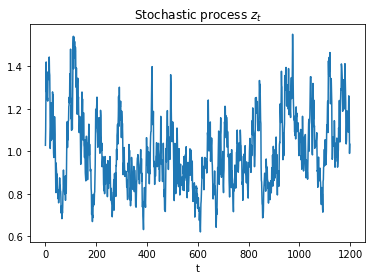

In [14]:
z = np.exp(log_z)
plt.plot(z)
plt.title('Stochastic process $z_t$')
plt.xlabel('t')
plt.show()

We also need to construct the auxiliary variable $Z_t = \Gamma^{-1} X_t$. Note that

In [15]:
Γ_inv = inv(Γ_new)
print(Γ_inv)

[[ 0.68015074  0.73307228 -6.34743225]
 [ 0.          0.          6.42649372]
 [ 0.73307228 -0.68015074 -0.09962616]]


We will partition the matrix based on stable and unstable eigenvalues
\begin{align*}
\Gamma^{-1} &=
\begin{bmatrix}
G_{11} & G_{12} \\
G_{21} & G_{22}
\end{bmatrix}
\end{align*}

In [16]:
G_22 = Γ_inv[2:, 1:]
G_21 = Γ_inv[:1, 2:]

Transversality requires that
\begin{align*}
Z_{2, t} &= G_{21} \tilde{c}_t + G_{22}
\begin{bmatrix}
\tilde{k}_t \\
\tilde{z}_t
\end{bmatrix}
=0
\\
\Rightarrow
\tilde{c}_t &= -G_{21}^{-1} G_{22} 
\begin{bmatrix}
\tilde{k}_t \\
\tilde{z}_t
\end{bmatrix}
\end{align*}

In [17]:
# Construct series for log deviations of output, consumption and capital
c_tilde = np.zeros(T)
k_tilde = np.zeros(T)
y_tilde = np.zeros(T)

for t in range(T-1):
    z_tilde = log_z[t]
    x = np.array([k_tilde[t],
                  z_tilde])
    c_tilde[t] = -inv(G_21) @ G_22 @ x
    y_tilde[t] = z_tilde + θ * k_tilde[t]
    k_tilde[t+1] = y_tilde[t] - c_tilde[t]

## Problem 9

In [18]:
discard_number = 200  # Remove the first x number of observations

# These are the log deviations from the steady state
log_k = k_tilde[discard_number:]
log_c = c_tilde[discard_number:]
log_y = y_tilde[discard_number:]

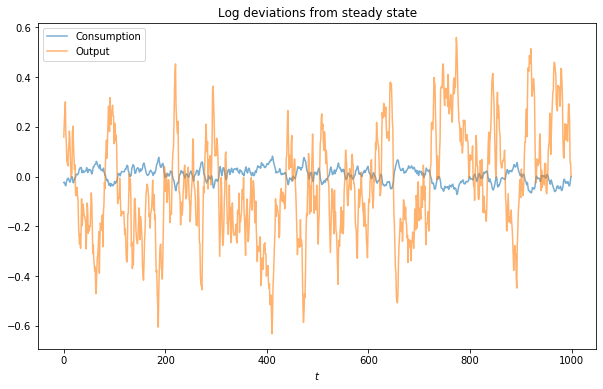

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(log_c, alpha=0.6, label='Consumption')
plt.plot(log_y, alpha=0.6, label='Output')
plt.xlabel('$t$')
plt.title('Log deviations from steady state')
plt.legend()
plt.show()

In [20]:
model = tsa.AR(log_c)
results = model.fit(maxlag=1)
print(results.params.round(3))

[0.    0.962]


The value of the AR(1) parameter is approximately 0.96.

## Problem 10

We now have
$$
\frac{rk}{y} = \frac{rk}{k^\theta} = rk^{1 - \theta} = 0.65 = \theta
$$

To find $\delta$, note that the share of investment is
$$
\frac{i}{y} = \frac{\delta k}{y} = \frac{\delta k}{k^\theta} = \delta k^{1 - \theta} = 0.25
$$

Therefore,
$$
\frac{\delta k^{1 - \theta}}{r k^{1 - \theta}}
= \frac{\delta}{r} = \frac{0.25}{\theta}
$$
so
$$
\delta = \frac{0.25}{\theta} \cdot r \approx 0.19
$$

From the steady state version of the euler equation,
$$
\frac{1}{\beta} 
= \theta \frac{y}{k} + 1 - \delta 
= \theta \frac{k^\theta}{k} + 1 - \delta 
= \theta \frac{1}{k^{1-\theta}} + 1 - \delta 
= \theta \frac{r}{\theta} + 1 - \delta
= r + 1 - \delta
$$
This implies $\beta = \frac{1}{r + 1 - \delta} \approx 0.97 $

In [21]:
# Find new parameters and steady state values
θ = 0.65
δ = (0.25 / θ) * r
β = 1 / (r + 1 - δ)
k_bar = ((1 / θ) * ((1 / β) - (1 - δ)))**(1 / (θ - 1))
y_bar = k_bar**θ
c_bar = y_bar - δ * k_bar

# Find the Markovian matrix
R = (θ - 1) * (y_bar / k_bar)
M = np.array([[1 - β * R * (c_bar / k_bar),     R, β * (y_bar / k_bar) * (ρ + R)],
              [           -(c_bar / k_bar), 1 / β,                 y_bar / k_bar],
              [0,                               0,                             ρ]])

# Find eigenvalues and eigenvectors
λ, Γ = np.linalg.eig(M)
sort_i = np.argsort(λ)  # Sort eigenvalues from smallest to largest
λ_new = λ[sort_i]
print(λ_new)

[0.9        0.97409849 1.05817763]


In [22]:
Γ_new = Γ[:, sort_i]  # Sort eigenvectors based on eigenvalues
Γ_inv = inv(Γ_new)
print(Γ_inv)

[[ 0.          0.          1.67048727]
 [-0.96183323 -0.45694672 -1.32010773]
 [ 0.75966431 -0.74621284 -0.04997587]]


In [23]:
# Partition the matrix based on stable and unstable eigenvalues
G_22 = Γ_inv[2:, 1:]
G_21 = Γ_inv[:1, 2:]

In [24]:
# Construct series for log deviations of output, consumption and capital
c_tilde = np.zeros(T)
k_tilde = np.zeros(T)
y_tilde = np.zeros(T)

for t in range(T-1):
    z_tilde = log_z[t]
    x = np.array([k_tilde[t],
                  z_tilde])
    c_tilde[t] = -inv(G_21) @ G_22 @ x
    y_tilde[t] = z_tilde + θ * k_tilde[t]
    k_tilde[t+1] = y_tilde[t] - c_tilde[t]

In [25]:
# These are the log deviations from the steady state
log_k = k_tilde[discard_number:]
log_c = c_tilde[discard_number:]
log_y = y_tilde[discard_number:]

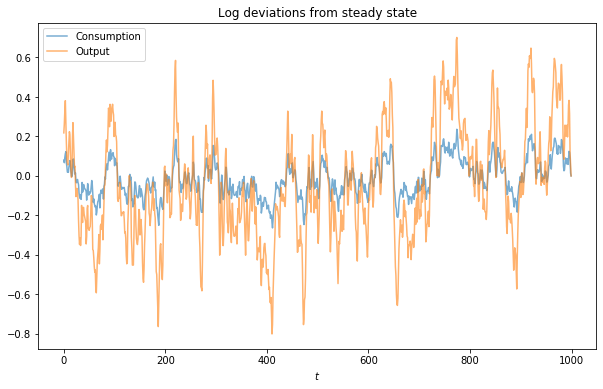

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(log_c, alpha=0.6, label='Consumption')
plt.plot(log_y, alpha=0.6, label='Output')
plt.xlabel('$t$')
plt.title('Log deviations from steady state')
plt.legend()
plt.show()

In [27]:
# Fit the AR(1) model
model = tsa.AR(log_c)
results = model.fit(maxlag=1)
print(results.params.round(3))

[-0.001  0.943]


The earlier model is closer to a random walk for consumption (as indicated by an AR(1) parameter of 0.96 versus 0.94 for this model).

The economic reason for this is that as $\theta \to 1$, the marginal product of capital, $\frac{dy}{dk} = \theta k^{\theta-1}$, becomes more insensitive to changes in capital stock. Therefore, their is less incentive for people to adjust their consumption according to shocks to output, and thus log consumption exhibits higher autocorrelation. We also see this in the two plots of log deviations of output and consumption. The first model shows much smoother (and more autoregressive) consumption relative to changes in output.